# Comparison of different ensembles
This notebook is used to create multiline plots which are used to compare different ensembles to each other

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 16})

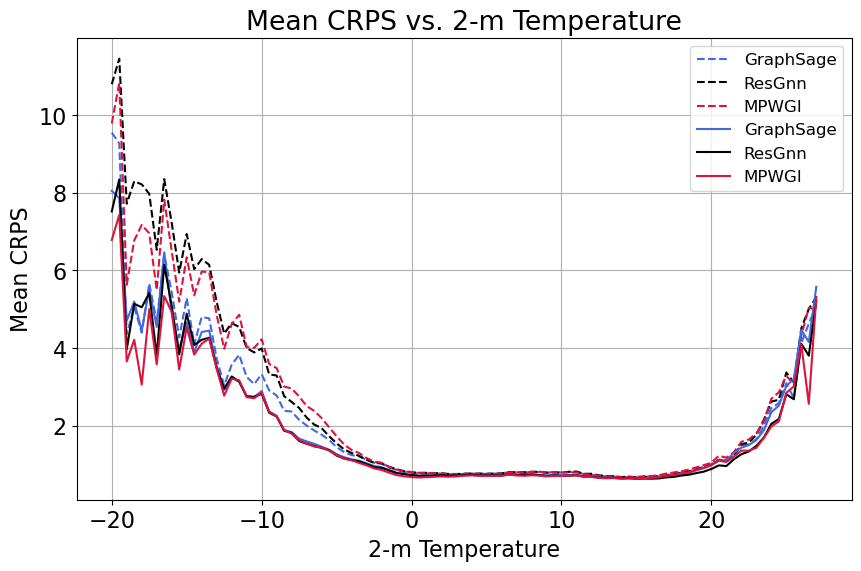

In [2]:
def get_color(name):
    if "GraphSage" in name:
        return "royalblue"
    elif "ResGnn" in name:
        return "black"
    else:
        return "crimson"

def get_label(name):
    if "GlobalInfo" not in name:
        return name.split("_")[3]
    else:
        return "MPWGI"

# Create a line plot
df = pd.read_csv('meanCRPSVsTemp.csv')
y_bins = df.bins

plt.figure(figsize=(10, 6))
for col in df.columns[1:]:
    if "best" in col:
        if "small" in col:
            plt.plot(y_bins, df[col], linestyle='--', label=get_label(col), color=get_color(col))
        if "large" in col:
            plt.plot(y_bins, df[col], linestyle='-', label=get_label(col), color=get_color(col))
plt.xlabel('2-m Temperature')
plt.ylabel('Mean CRPS')
plt.title('Mean CRPS vs. 2-m Temperature')
plt.legend(fontsize=12)
plt.grid()
plt.savefig(f"plots/CRPSVsTemp.pdf", format='pdf', dpi=300, bbox_inches='tight')

# Standard Deviation vs Temperature

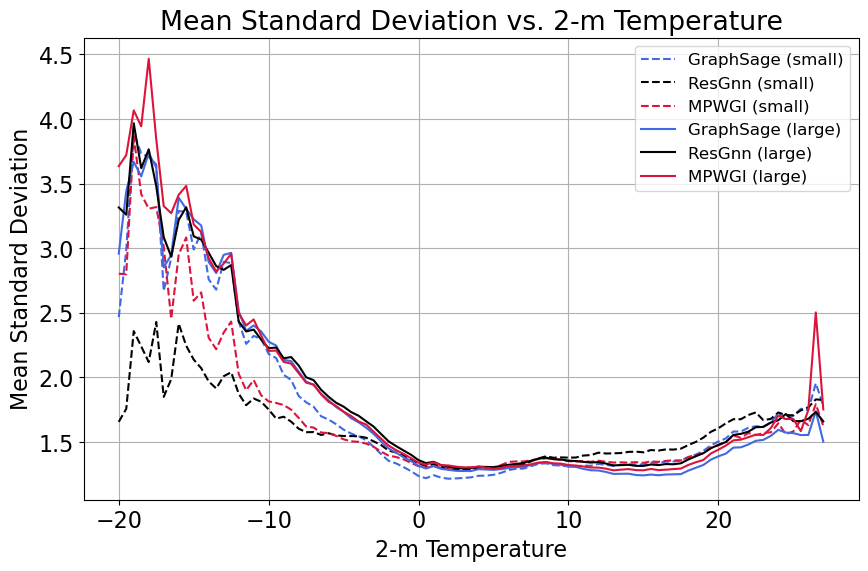

In [3]:
df = pd.read_csv("meanSigmaVsTemp.csv")

plt.figure(figsize=(10, 6))
for col in df.columns[1:]:
    if "best" in col:
        if "small" in col:
            plt.plot(y_bins, df[col], linestyle='--', label=get_label(col) + " (small)", color=get_color(col))
        if "large" in col:
            plt.plot(y_bins, df[col], linestyle='-', label=get_label(col) + " (large)", color=get_color(col))
plt.xlabel('2-m Temperature')
plt.ylabel('Mean Standard Deviation')
plt.title('Mean Standard Deviation vs. 2-m Temperature')
plt.legend(fontsize=12)
plt.grid()
plt.savefig(f"plots/SDVsTemp.pdf", format='pdf', dpi=300, bbox_inches='tight')